# Introduction to Multiple Linear Regression

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("../data/financial_regression.csv")

# Analize the dataframe

In [80]:
df.head(20)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.5200,46.22,...,45.020,43.86,44.8400,364528.0,1.160,111.51,112.37,110.7900,112.030,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.5500,45.65,...,45.760,44.40,45.7600,442210.0,1.360,111.35,112.01,110.3800,110.860,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.6400,45.95,...,47.080,45.70,46.9400,629150.0,1.380,110.95,111.75,110.8300,111.520,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.6040,45.43,...,47.310,45.17,47.0500,643198.0,2.140,109.97,110.05,108.4600,108.940,17534231.0
5,2010-01-21,113.92,114.27,111.56,111.70,344747028.0,2.71,46.06,46.3500,45.30,...,46.980,45.07,45.3000,388457.0,1.910,108.48,108.78,106.6100,107.370,25747831.0
6,2010-01-22,111.20,111.74,109.09,109.21,345627282.0,2.65,45.34,45.4800,44.04,...,44.386,42.60,43.3000,343595.0,1.786,106.93,107.68,106.0100,107.170,24209966.0
7,2010-01-25,110.21,110.41,109.41,109.77,186751367.0,1.00,44.39,44.6000,44.12,...,44.420,43.43,44.3600,184431.0,0.990,107.44,107.72,107.0700,107.480,13170442.0
8,2010-01-26,109.34,110.47,109.04,109.31,210788669.0,1.43,44.28,44.8900,44.05,...,43.100,42.38,42.7500,338167.0,0.720,106.87,107.99,106.7500,107.560,12274165.0
9,2010-01-27,109.17,110.08,108.33,109.83,271482263.0,1.75,44.29,44.8500,44.01,...,42.440,40.93,41.3400,419800.0,1.510,107.53,108.80,106.1600,106.528,18991219.0


In [81]:
df.tail(20)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
3884,2024-09-26,574.38,574.7100,569.9000,572.30,48336004.0,4.8100,493.37,493.700,485.8000,...,97.2500,95.8400,96.30,68187.0,1.4100,246.44,247.37,245.1900,246.98,7041063.0
3885,2024-09-27,573.39,574.2200,570.4200,571.47,42100928.0,3.8000,490.50,490.640,485.5600,...,96.0400,92.7500,92.95,131407.0,3.2900,246.31,246.75,244.1900,245.02,8329633.0
3886,2024-09-30,570.42,574.3800,568.0800,573.76,63655448.0,6.3000,485.78,488.410,482.9200,...,92.2092,90.1000,91.66,112342.0,2.1092,243.97,244.08,242.5000,243.06,6919352.0
3887,2024-10-01,573.40,574.0622,566.0000,568.62,72668778.0,8.0622,487.70,488.000,477.4000,...,92.9200,90.6021,92.16,69560.0,2.3179,245.20,246.98,245.0600,245.61,10605494.0
3888,2024-10-02,567.71,569.9000,565.2700,568.86,38097798.0,4.6300,480.36,483.880,477.7200,...,94.0500,92.6105,93.86,82151.0,1.4395,245.61,246.07,243.9900,245.66,6798783.0
3889,2024-10-03,567.36,569.8025,565.4900,567.82,40846466.0,4.3125,479.74,484.545,478.9900,...,92.3300,90.3650,92.19,78358.0,1.9650,244.72,245.91,243.6900,245.49,5674503.0
3890,2024-10-04,572.35,573.3600,568.1000,572.98,43005186.0,5.2600,487.45,487.880,482.3850,...,93.3000,91.4470,93.00,196979.0,1.8530,245.00,246.69,244.0450,245.00,5951628.0
3891,2024-10-07,571.30,571.9599,566.6300,567.80,49964690.0,5.3299,485.39,486.570,480.8700,...,94.7253,92.3355,94.53,219603.0,2.3898,244.58,244.82,243.8100,244.17,3849026.0
3892,2024-10-08,570.42,573.7800,569.5299,573.17,37398693.0,4.2501,484.66,489.990,483.8450,...,94.4500,91.5000,94.07,497427.0,2.9500,243.79,244.04,240.6300,242.37,7669807.0
3893,2024-10-09,573.16,577.7100,572.5500,577.14,37912244.0,5.1600,489.00,493.730,487.9500,...,95.9700,92.9100,95.63,70004.0,3.0600,241.16,241.84,240.6400,241.05,4120486.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [83]:
df.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


# Cleaning the dataset

<Axes: >

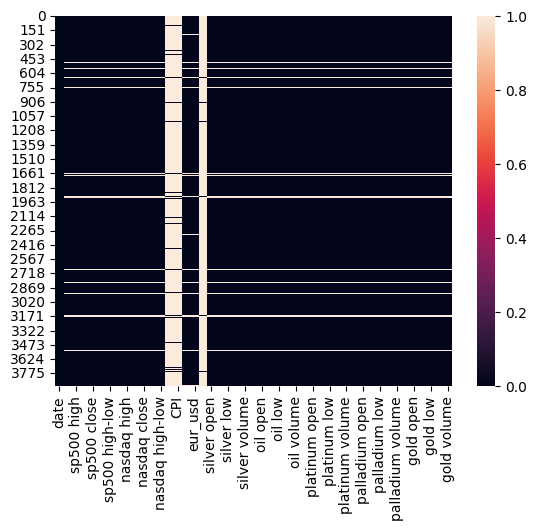

In [84]:
sns.heatmap(df.isnull())

In [85]:
df.drop(["CPI", "date"], axis=1, inplace=True)

<Axes: >

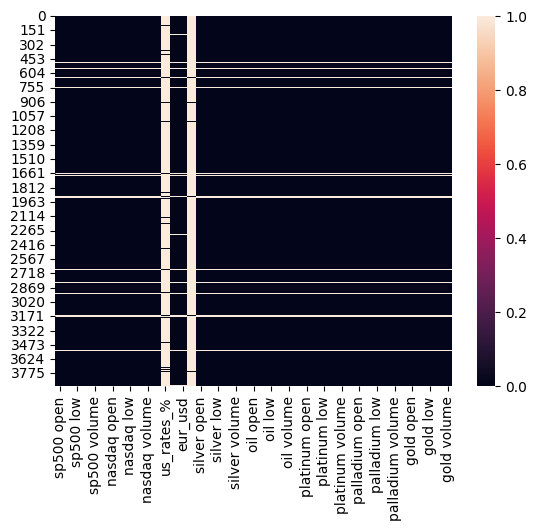

In [86]:
sns.heatmap(df.isnull())

<Axes: >

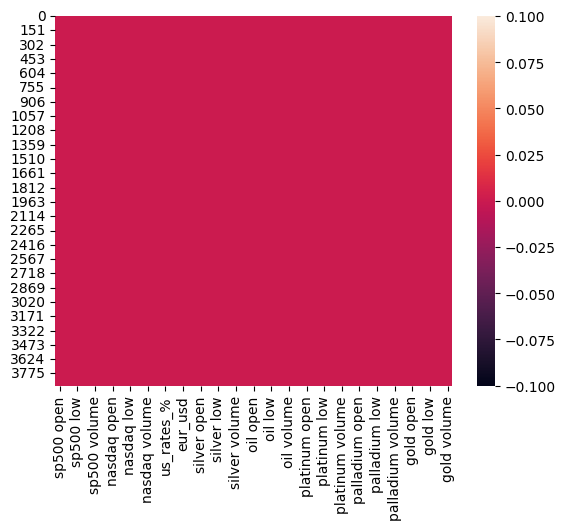

In [87]:
#df.dropna(axis=1, inplace=True)
df.interpolate(method="linear", inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

sns.heatmap(df.isnull())

# Watching some charts

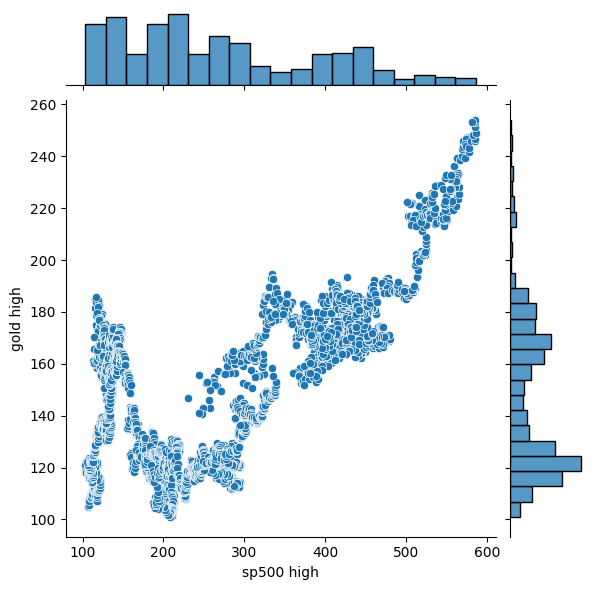

In [88]:
sns.jointplot(x="sp500 high", y="gold high", data=df, alpha=1)

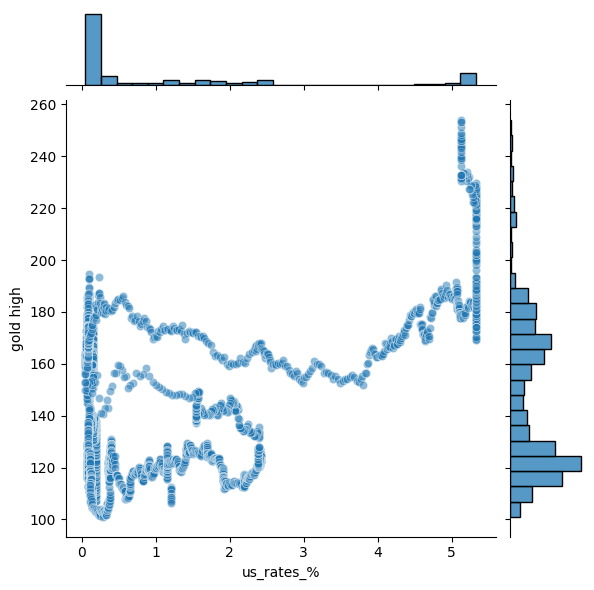

In [89]:
sns.jointplot(x="us_rates_%", y="gold high", data=df, alpha=0.5)

<Axes: xlabel='sp500 high', ylabel='gold high'>

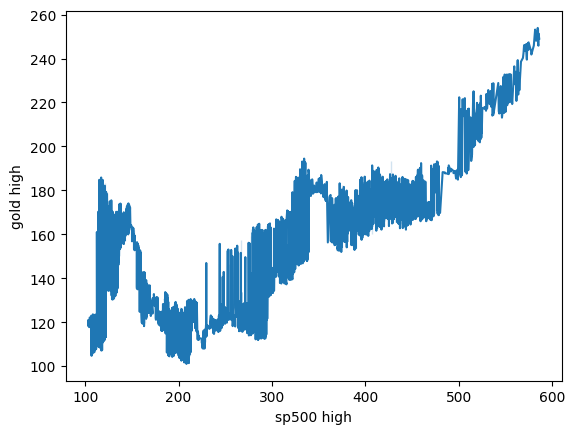

In [90]:
sns.lineplot(x="sp500 high", y="gold high", data=df)

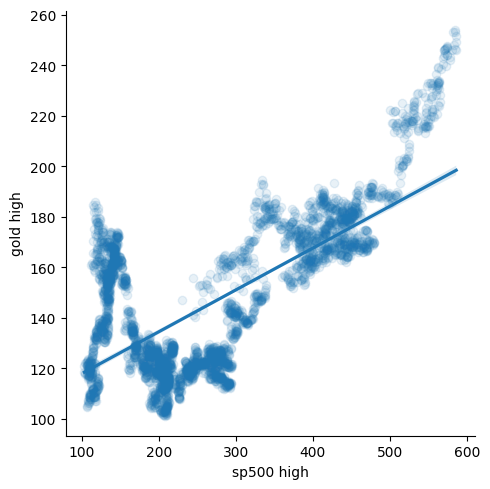

In [91]:
sns.lmplot(x="sp500 high", y="gold high", data=df, scatter_kws={"alpha":0.1})

# Split data and normalize

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = df.drop(["gold high"], axis=1)
y = df["gold high"]

#X.head(10)
y.head(10)

0    112.37
1    112.01
2    111.88
3    111.75
4    110.05
5    108.78
6    107.68
7    107.72
8    107.99
9    108.80
Name: gold high, dtype: float64

In [94]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X)

X_scaled

array([[-1.2713674 , -1.27112766, -1.26643368, ..., -1.15516782,
        -1.12921322,  1.42297634],
       [-1.26938859, -1.27358814, -1.27655226, ..., -1.16911717,
        -1.16876664,  1.37308247],
       [-1.27396458, -1.27239891, -1.27493495, ..., -1.16146204,
        -1.15761054,  0.75596737],
       ...,
       [ 2.59852258,  2.5812499 ,  2.60002755, ...,  3.60598335,
         3.57629082, -0.05929461],
       [ 2.57543648,  2.57837934,  2.59820205, ...,  3.66688416,
         3.66790599, -0.63313275],
       [ 2.57716794,  2.55548537,  2.54872881, ...,  3.58795126,
         3.5644586 , -0.28189705]])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=2)

# Training the model

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [98]:
lm.coef_  # Coefficients

array([ 1.27308261e+00, -1.13969133e+00, -1.15433560e+00,  1.06319106e+00,
       -1.07756436e-02,  8.28312568e-02, -6.10194718e-01,  7.53282510e-01,
        7.66329230e-01, -9.86161508e-01, -2.13235831e-02, -4.10737941e-02,
        4.11417705e-03, -7.96783445e-03, -7.94462055e-03, -1.79919931e-02,
       -7.78089297e+00,  7.03463881e+00,  7.26728847e+00, -6.65672424e+00,
       -9.36039427e-04,  1.53249378e-01,  3.54381741e-01, -1.21304318e-01,
       -1.23676533e-01, -5.55787649e-02,  1.00945499e-02, -1.21601106e-02,
       -4.29545378e+00,  4.20923209e+00,  4.23393463e+00, -4.16270604e+00,
       -7.37850588e-03,  5.67514712e-02, -2.74714206e-01,  2.14100268e-01,
        2.20340551e-01, -1.85109321e-01, -2.16618547e-02, -6.66476791e-03,
        2.02545967e+01, -1.00702829e+01,  1.95606628e+01,  1.25779832e-01])

In [99]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=["Coef"])
cdf

,Coef
sp500 open,1.273083
sp500 high,-1.139691
sp500 low,-1.154336
sp500 close,1.063191
sp500 volume,-0.010776
sp500 high-low,0.082831
nasdaq open,-0.610195
nasdaq high,0.753283
nasdaq low,0.766329
nasdaq close,-0.986162


# Predictions

In [100]:
predictions = lm.predict(X_test)

predictions


array([164.59898969, 192.13573663, 170.24978041, ..., 216.13044642,
       122.13337775, 165.25547089])

AttributeError: module 'matplotlib' has no attribute 'xlabel'

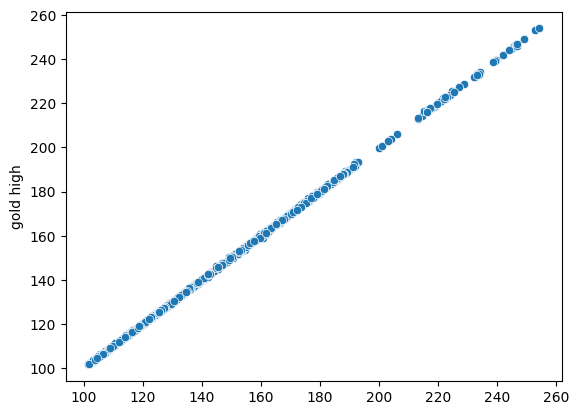

In [111]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")

# Evaluate the model

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"Mean Square Error: {mean_squared_error(y_test, predictions)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
print(f"Root Mean Square Error: {np.sqrt(mean_squared_error(y_test, predictions))}")

Mean Square Error: 0.06339903970573908
Mean Absolute Error: 0.18070423262294494
Root Mean Square Error: 0.251791659325203


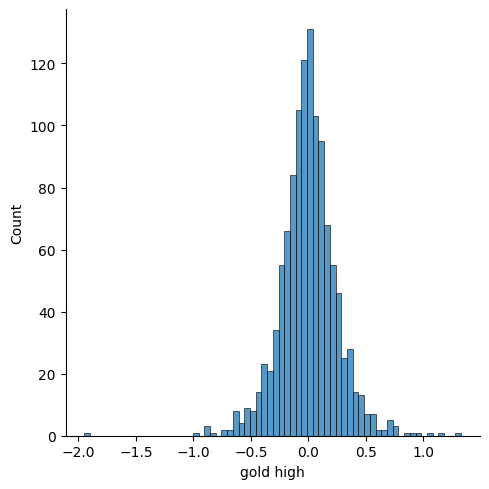

In [114]:
residuals = y_test - predictions

sns.displot(residuals)

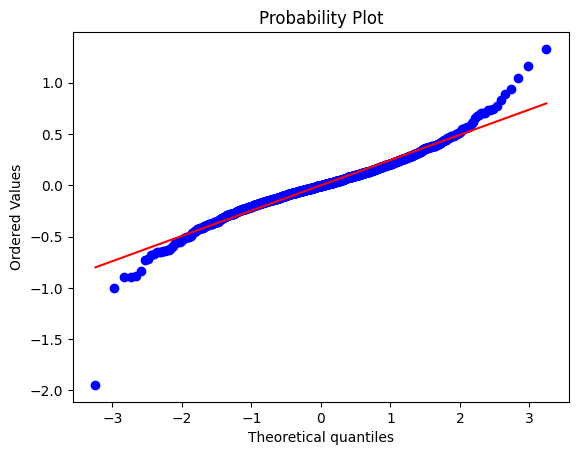

In [115]:
import pylab
import scipy.stats as stats 

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()